# Get Segmented Histogram

This notebook demonstrates how to:
1. Import raw grayscale CT/microCT data
2. Generate and visualize histograms of intensity distributions based on the threshold segmentation.
3. Save the colored histogram figure to the output folder

## Import Required Modules

We'll use the Digital Rock Physics template package to handle data import, visualization, and analysis:

In [1]:
import drp_template.input_output as io
import drp_template.image as image
import drp_template.default_params as params

## Load Grayscale Data

Set the file path and dimensions for the raw uint16 data file. This example uses a 50³ voxel cube of segmented CT data.

**Parameters:**
- `raw_file_path`: Path to the raw binary file containing grayscale intensity values
- `dimensions`: Dictionary specifying the 3D dimensions (nz, ny, nx) of the dataset
- `dtype`: Data type of the raw file ('uint16' for 16-bit unsigned integer data)

In [2]:
# Set file paths and dimensions
raw_file_path = '../data/data_raw_uint16_50cube.raw'
dimensions = {'nz': 50, 'ny': 50, 'nx': 50}

# Import the raw data
# This will automatically generate a JSON parameter file with the same base name
data = io.import_model(file_path=raw_file_path, dtype='uint16', dimensions=dimensions)

# The parameter filename follows the naming convention: <base_filename>.json
# This file stores metadata about dimensions, data type, and analysis parameters

Parameters filename: data_raw_uint16_50cube.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 50
ny: 50
nz: 50


## Define the Parameter File

After importing the data, a JSON parameter file is automatically created. This file stores metadata about your dataset including:
- Dimensions (nx, ny, nz)
- Data type (uint16, uint8, etc.)
- File paths
- Analysis parameters (thresholds, labels, etc.)

**Naming Convention:** The parameter file automatically takes the same base name as your raw data file:
- Raw file: `data_segmented_uint16_50cube.raw`

This naming convention ensures that parameter files are easily traceable to their corresponding data files.

In [3]:
# Define parameter files
params_file_raw = 'data_raw_uint16_50cube.json'

## Define Threshold Ranges for Colored Histogram

To visualize the grayscale histogram with color-coded phases, we define threshold ranges that correspond to different material phases. These thresholds represent the grayscale intensity ranges that were used during the segmentation process.

**Threshold Dictionary Structure:**
- Each key represents a material phase name
- Each value is a list `[min_intensity, max_intensity]` defining the grayscale range for that phase

**Example Phases:**
- **Pore**: Low-density voids (darkest in grayscale images)
- **Qtz**: Quartz mineral phase
- **Fsp**: Feldspar mineral phase
- **Bt**: Biotite mineral phase
- **hDensity**: High-density minerals (brightest in grayscale images)

The thresholds are saved to the parameter file for documentation and reproducibility.

In [4]:
# Define threshold ranges for different material phases
thresholds = {
    "Pore": [0, 4000],
    "Qtz": [4001, 4550],
    "Fsp": [4551, 5500],
    "Bt": [5501, 11000],
    "hDensity": [11001, 65535]
}

# Save thresholds to parameter file
params.update_parameters_file(paramsfile=params_file_raw, thresholds=thresholds)

# Display the defined threshold ranges
print("Threshold ranges defined:")
for phase, range_vals in thresholds.items():
    print(f"  {phase:10s}: {range_vals[0]:5d} - {range_vals[1]:5d}")

Threshold ranges defined:
  Pore      :     0 -  4000
  Qtz       :  4001 -  4550
  Fsp       :  4551 -  5500
  Bt        :  5501 - 11000
  hDensity  : 11001 - 65535


## Visualize Colored Histogram

Generate a histogram of the grayscale intensity distribution with color-coded regions corresponding to the defined threshold ranges. Each material phase will be displayed in a different color, making it easy to visualize how the grayscale values are distributed across different materials.

**Histogram Parameters:**
- `data`: The 3D grayscale array to analyze
- `thresholds`: Dictionary of phase ranges for color-coding
- `paramsfile`: JSON file containing metadata
- `log_scale='y'`: Use logarithmic scale on y-axis for better visualization of low-frequency bins

**Output:**
The histogram will be saved as `figure_colored_hist.png` in the `output/` folder, showing the intensity distribution with each phase highlighted in a distinct color.

Figure saved at: /Users/martin/Data/CODING_WORLD/PYTHON/Digital_Rock_Physics_Template/examples/visualization/output/figure_colored_hist.png


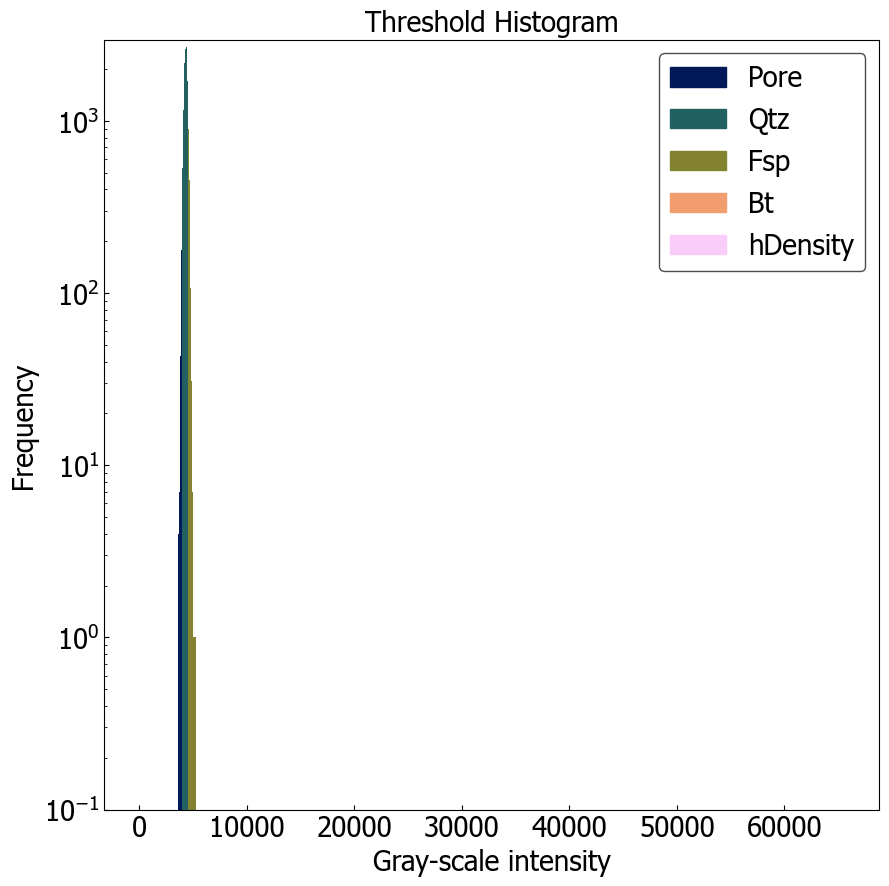

In [8]:
fig, ax = image.histogram(
    data=data,
    thresholds=thresholds,
    paramsfile=params_file_raw,
    dtype=None,
    cmap_set=None,
    title=None,
    log_scale='y',
    dark_mode=False,
    num_bins=None
)

image.save_figure(fig, filename='figure_colored_hist')